In [6]:
import numpy as np
from sklearn import neighbors,datasets,cross_validation
import matplotlib.pyplot as plt

In [7]:
# 使用sklearn自带的数字识别数据
def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0, stratify=digits.target)

In [8]:
# 测试分类KNN：
def test_KNeighborsClassifier(*data):
    X_train,X_test,Y_train,Y_test = data
    knc = neighbors.KNeighborsClassifier()
    knc.fit(X_train,Y_train)
    
    print('【训练集成绩】Training Score:{0}'.format(knc.score(X_train,Y_train)))
    print('【测试集成绩】Testing  Score:{0}'.format(knc.score(X_test,Y_test)))

In [9]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_KNeighborsClassifier(X_train,X_test,Y_train,Y_test)

【训练集成绩】Training Score:0.9910913140311804
【测试集成绩】Testing  Score:0.98


In [15]:
# 检验【K】值与【投票策略】对结果的影响
def test_KNC_k_w(*data):
    X_train,X_test,Y_train,Y_test = data
    Ks = np.linspace(1,Y_train.size,num=50,endpoint=False,dtype='int')
    weights = ['uniform','distance']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for weight in weights :
        train_score = []
        test_score = []
        for K in Ks:
            knc = neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            knc.fit(X_train,Y_train)
            train_score.append(knc.score(X_train,Y_train))
            test_score.append(knc.score(X_test,Y_test))

        ax.plot(Ks,train_score,label='Training Score: weight={0}'.format(weight))
        ax.plot(Ks,test_score, label='Testing Score: weight={0}'.format(weight))
        
    ax.set_xlabel(r'K')
    ax.set_ylabel('score')
    ax.set_title('KNeighborsClassifier')
    ax.legend(loc='best')
    ax.set_ylim(0,1.05)
    plt.show()

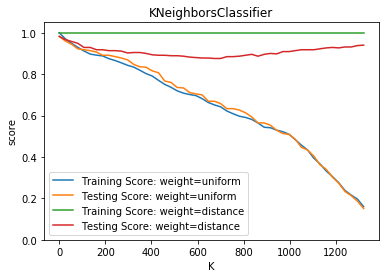

In [16]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_KNC_k_w(X_train,X_test,Y_train,Y_test)

In [17]:
# 检验【P】距离函数对结果的影响
def test_KNC_p(*data):
    X_train,X_test,Y_train,Y_test = data
    Ks = np.linspace(1,Y_train.size,endpoint=False,dtype='int')
    Ps = [1,2,10]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for P in Ps :
        train_score = []
        test_score = []
        for K in Ks:
            knc = neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            knc.fit(X_train,Y_train)
            train_score.append(knc.score(X_train,Y_train))
            test_score.append(knc.score(X_test,Y_test))

        ax.plot(Ks,train_score,label='Training Score: P={0}'.format(P))
        ax.plot(Ks,test_score, label='Testing Score: P={0}'.format(P))
        
    ax.set_xlabel(r'K')
    ax.set_ylabel('score')
    ax.set_title('KNeighborsClassifier')
    ax.legend(loc='best')
    ax.set_ylim(0,1.05)
    plt.show()

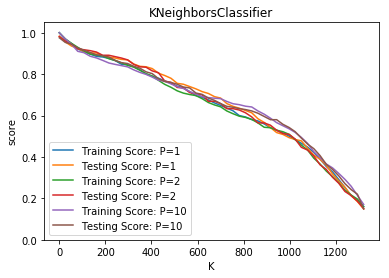

In [19]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_KNC_p(X_train,X_test,Y_train,Y_test)